# Visual Data Processing
**Bardia Khosravi, MD MPH MHPE**

by: Bardia Khosravi, MD MPH MHPE <a href="https://twitter.com/Khosravi_Bardia"><img width="16" src="https://i.ibb.co/J7Tpg3Q/twitter-logo-2429.png"></a>

*Mayo Clinic AI Lab, Department of Radiology, Mayo Clinic, Rochester, MN, US*

## 0. Data preparation 

Run the next cell to prepare this session's files.

In [ ]:
!git clone --filter=blob:none --no-checkout https://github.com/BardiaKh/Workshops.git
%cd Workshops
!git sparse-checkout init --cone
!git sparse-checkout set 2023/AI_Research_School
!git checkout
!mv 2023/AI_Research_School/* /content/
%cd /content
!rm -r /content/Workshops

## 1. Introduction

In this workshop, we work with three image handling libraries, namely Pillow, OpenCV, and skimage. Each library has its own pros and cons, which we will cover at the end of this session. But first, lets dive into what images are made up of.

In [1]:
# @title Run this cell to visualize an image with its pixel values. { vertical-output: true, display-mode: "form" }
# @markdown *You can take a sneak peak at the code*.

import pandas as pd
import matplotlib as mpl

img = pd.read_csv("image.csv")
cmap = mpl.colors.LinearSegmentedColormap.from_list("bw", ["black", "white"])
img.style.background_gradient(cmap=cmap)

In a colored image, you have three different dimensions:


1.   The first dimension is the image height (H)
2.   The second dimension is the image width (W)
3.   The third dimension is the image channels (C)

In short, you can say the array is `H:W:C`.

Most computer displays show images as a collection of pixels, and each pixel creates color by mixing specific amounts of red, green, and blue light. These specific amounts are stored in three different channels when we save images.

<br>
<img src="https://i.ibb.co/CbgLynF/Image-Channels.png" alt="Figure 5" style='margin:auto' border="0">

<u><b>Figure 1.</b> RGB Image Coordination System ([source](https://towardsdatascience.com/understanding-images-with-skimage-python-b94d210afd23))</u><br><br>

So imagine that our image is made up of three layers each with a height of 512px and a width of 512px. These layers are stacked together to create an RGB image.

Usually natural images are 8-bit, meaning that each pixel value can range from 0-255.

## 2. Libraries

Before starting, we have to install the three libraries. These libraries are already installed on Colab, but to install these libraries in your local computer, you can copy and paste the following code in a new cell and run the cell:

```python
!pip install scikit-image opencv-python pillow
```

*Disclaimer:* Most of the images used for this section are created by an AI model called [Stable Diffusion](https://stability.ai) ([source](https://simplified.com/blog/ai-text-to-image/stable-diffusion-images/)).

**2.1. Pillow (PIL)**

This is a high-level library for image IO and simple manipulation. It is based on C, so it is faster than pyhton-based packages. You can open a file with PIL like this:

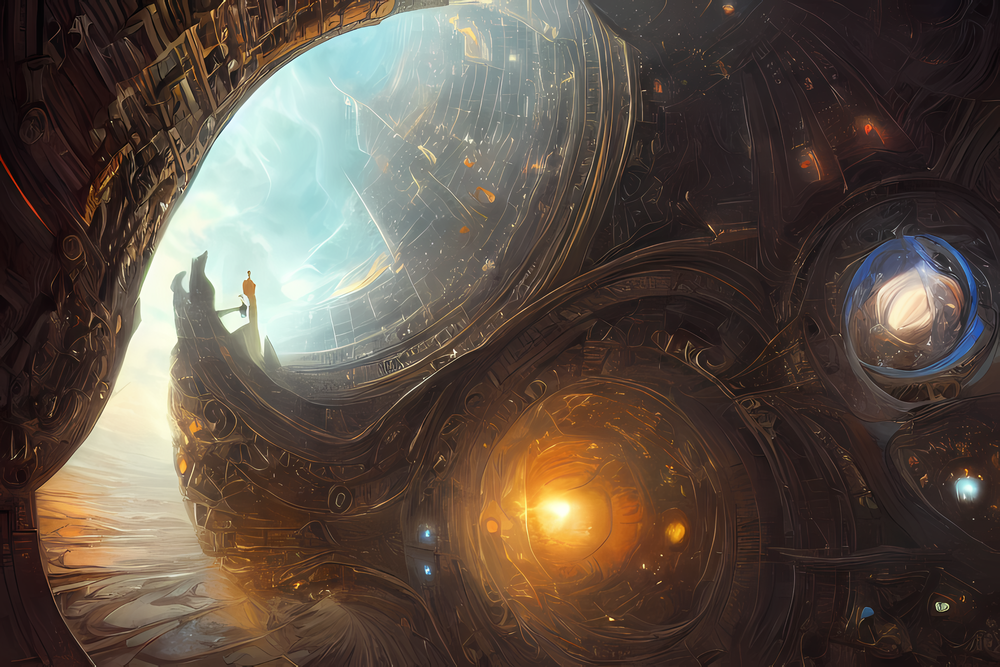

In [2]:
from PIL import Image

raw_image = Image.open("samples/img_1.png")
raw_image

As you see, notebook environment supports displaying PIL images out of the box, i.e. without using any library (such as `matplotlib`). As we said, we images are multidimentional arrays, let's convert this PIL image to an array and inspect its characteristics:

In [3]:
import numpy as np

img = np.array(raw_image)

print("Image shape: ", img.shape)
print("Image data type: ", img.dtype)

Image shape:  (667, 1000, 3)
Image data type:  uint8


So in other words, we have an image with height of 667px, width of 1000px and three channels (red, green, and blue).
Let's visualize each channel independently. As we said previously, we need matplotlib library to show numpy arrays:

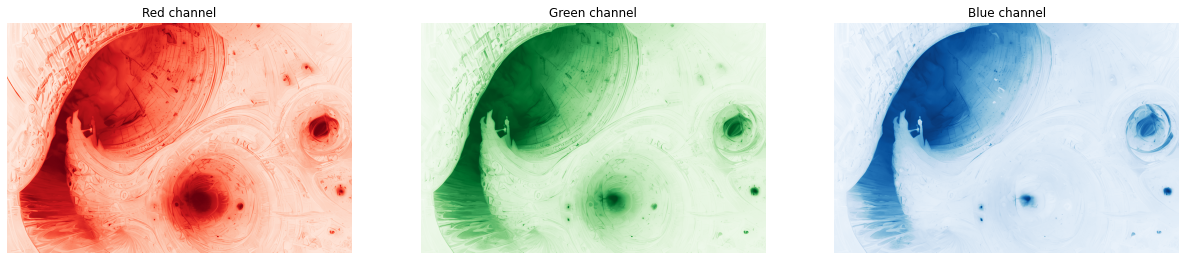

In [4]:
import matplotlib.pyplot as plt

# this is a magic command to display the image in the notebook
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax[0].imshow(img[:, :, 0], cmap="Reds")
ax[0].set_title("Red channel")
ax[1].imshow(img[:, :, 1], cmap="Greens")
ax[1].set_title("Green channel")
ax[2].imshow(img[:, :, 2], cmap="Blues")
ax[2].set_title("Blue channel")
_ = [ax_.set_axis_off() for ax_ in ax]
plt.show()

Grayscale images have only one channel (or even zero channels). This means that when being displayed, the value for the three RGB channels would be the same to create different shades of gray. Let's convert this image to grayscale and save it using PIL:

In [5]:
grayscale_image = img.mean(axis=2)
grayscale_image = Image.fromarray(grayscale_image.astype(np.uint8))
grayscale_image.save("grayscale_image.png")

Pillow allows for simple operations like rotation and flipping:

C:\Users\m253231\AppData\Local\Temp\ipykernel_11744\1933208711.py:1: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  raw_image.transpose(Image.ROTATE_90)


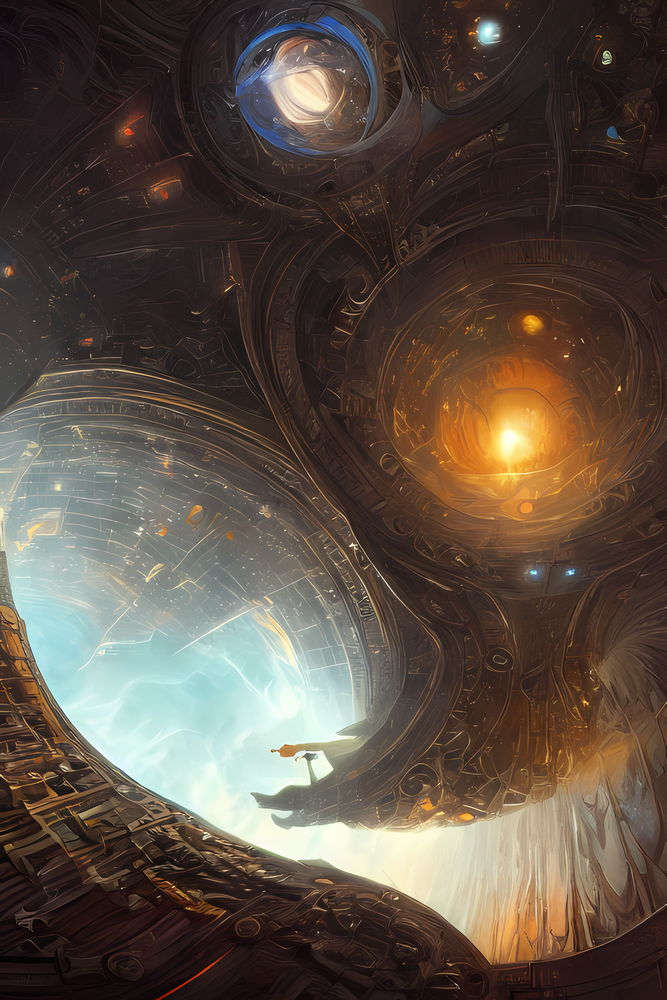

In [6]:
raw_image.transpose(Image.ROTATE_90)

C:\Users\m253231\AppData\Local\Temp\ipykernel_11744\231610299.py:1: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  raw_image.transpose(Image.FLIP_LEFT_RIGHT)


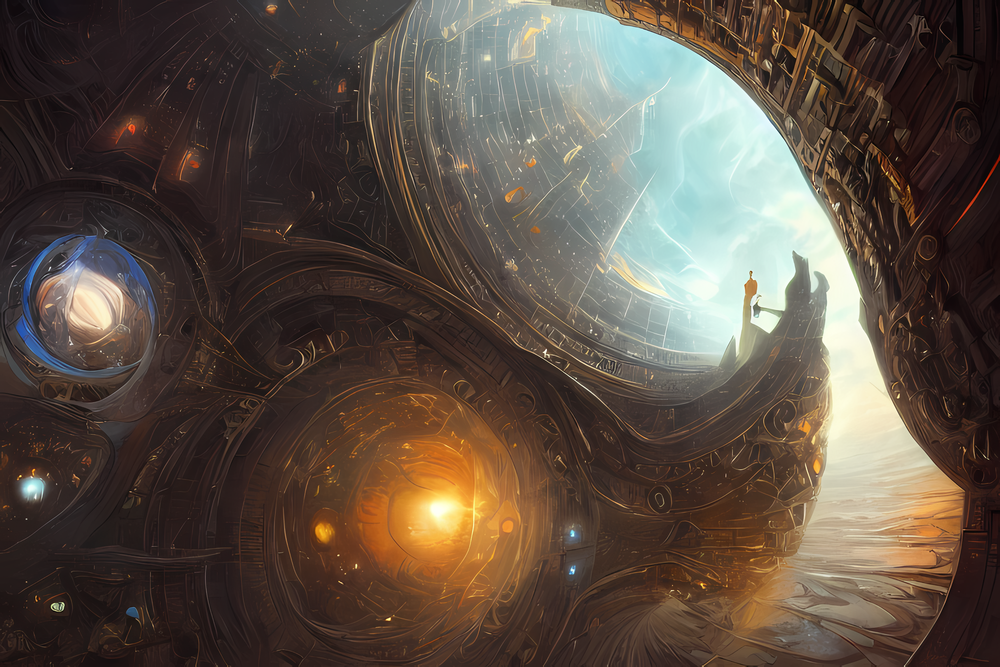

In [7]:
raw_image.transpose(Image.FLIP_LEFT_RIGHT)

There are some other capabilities, but other libraries that we discuss will do a better job in them so let's check them out.

**2.2. Skimage**

This is the most *pythonic* image processing library, it has a very familiar API and will take care of most pre- and post-processings that we usually need for deep learning tasks.

In [8]:
from skimage import io

raw_image = io.imread("samples/img_2.png")
raw_image

array([[[105, 121, 145, 255],
        [128, 141, 160, 255],
        [139, 148, 161, 255],
        ...,
        [ 11,  15,  61, 255],
        [  9,  12,  56, 255],
        [  5,  10,  54, 255]],

       [[128, 149, 170, 255],
        [145, 159, 177, 255],
        [149, 161, 174, 255],
        ...,
        [  9,  12,  60, 255],
        [ 13,  16,  66, 255],
        [ 12,  17,  67, 255]],

       [[105, 125, 147, 255],
        [106, 120, 142, 255],
        [105, 119, 140, 255],
        ...,
        [  6,   9,  55, 255],
        [ 11,  16,  66, 255],
        [ 21,  25,  81, 255]],

       ...,

       [[  1,   0,   1, 255],
        [  0,   0,   0, 255],
        [  0,   0,   1, 255],
        ...,
        [ 10,  12,  43, 255],
        [  7,  10,  43, 255],
        [  4,   8,  43, 255]],

       [[  1,   0,   1, 255],
        [  0,   0,   1, 255],
        [  1,   1,   1, 255],
        ...,
        [ 13,  13,  49, 255],
        [ 10,  12,  49, 255],
        [  7,  13,  49, 255]],

       [[  1

As you see, skimage ones images as arrays, so there is no need to convert it to numpy array. We can use the `matplotlib` library as we did before:

Image shape:  (499, 1000, 4)


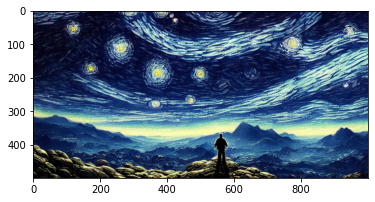

In [9]:
plt.imshow(raw_image);
print("Image shape: ", raw_image.shape)

What is the 4th channel?

In [10]:
raw_image = raw_image[:, :, :3]

Let's resize the image to half its size:

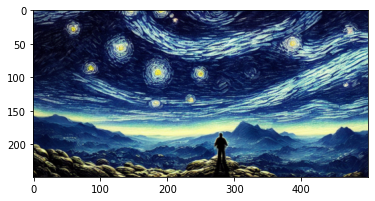

In [11]:
from skimage.transform import resize

new_image_size = (raw_image.shape[0]//2, raw_image.shape[1]//2) # height, width
resized_image = resize(raw_image, new_image_size)
plt.imshow(resized_image);

Let's inspect the values of the image:

In [12]:
print("Raw Image Range: ", raw_image.min(), raw_image.max())
print("Resized Image Range: ", resized_image.min(), resized_image.max())

Raw Image Range:  0 255
Resized Image Range:  0.0 0.9944795433112499


You see that the image data type is converted to float, ranging from 0-1. This is a common practice to rescale image intensities (will be discussed in future sessions), but we should be careful when we want to save the image, as we have to convert the range back to 0-255:

In [13]:
resized_image = (resized_image * 255).astype(np.uint8)
io.imsave("resized_image.png", resized_image)

**Practical Challenge 1**: As the images are arrays, write a function that gets a 100*100px crop from the center of the image:

Cropped Image Shape:  (100, 100, 3)


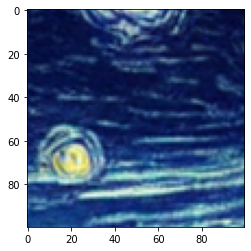

In [14]:
def center_crop_image(image):
    size = 100
    original_image = image.copy()
    ## START CODE HERE ## (≈ 1 line of code)

    image = image[image.shape[0]//2-size//2:image.shape[0]//2+size//2,image.shape[1]//2-size//2:image.shape[1]//2+size//2]

    ## END CODE HERE ##

    return image

cropped_image = center_crop_image(raw_image)
print("Cropped Image Shape: ", cropped_image.shape)
plt.imshow(cropped_image)

Padding is very similar to cropping an image. Essentially, when you want to pad an image, you create a larger image (with zeros on all pixels, i.e., black) and then *"paste"* the original image onto the new one.

**Practical Challenge 2**: Based on the abpve description, write a function that center pads an image for 100px. The original image should be the surrounded by 100 pixels of zeros on each side:

Padded Image Shape:  (699, 1200, 3)


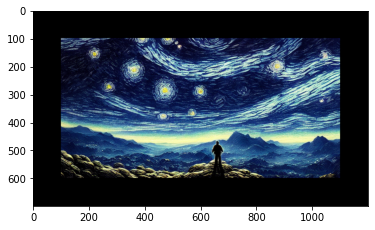

In [16]:
def center_pad_image(image):
    margin_size = 100
    original_image = image.copy()
    ## START CODE HERE ## (≈ 2 lines of code)

    # initialize the large image with zeros (np.zeros)
    large_image = np.zeros((original_image.shape[0]+ 2*margin_size, original_image.shape[1]+ 2*margin_size, 3), dtype=np.uint8)
    large_image[margin_size:-margin_size, margin_size:-margin_size, :] = image

    ## END CODE HERE ##

    return large_image

padded_image = center_pad_image(raw_image)
print("Padded Image Shape: ", padded_image.shape)
plt.imshow(padded_image)

Doing image transformations with skimage is much more intuitive. You can import that specific transform (`from skimage.transforms import ...`) and then use it as a function. A full list of supported transforms can be found [here](https://scikit-image.org/docs/stable/api/skimage.transform.html).

Rotated Image Range:  0.0 0.9992537587798882


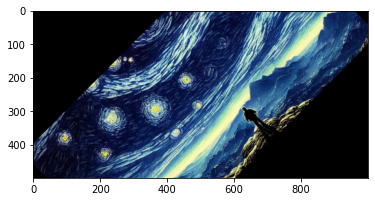

In [17]:
from skimage.transform import rotate

rotated_image = rotate(raw_image, angle=45)
plt.imshow(rotated_image);
print("Rotated Image Range: ", rotated_image.min(), rotated_image.max())

Skimage also has a lot more capabilities like contour detection, contrast enhancement, labeling operations, etc. that we will not discuss in this session.

**2.3. OpenCV (cv2)**

Open CV is a library of programming functions mainly aimed at real-time computer vision. It is used for image processing, video capture and analysis including features like face detection and object detection. Compared to other libraries, OpenCV is more efficient in processing (as it is based on C) and has a large number of functions.

Openning an image is easy with openCV:

Image shape:  (1664, 1664, 3)
Type:  <class 'numpy.ndarray'>


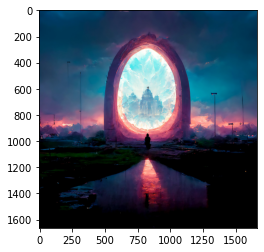

In [18]:
import cv2

raw_image = cv2.imread("samples/img_3.jpg")
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)
plt.imshow(raw_image);
print("Image shape: ", raw_image.shape)
print("Type: ", type(raw_image))

One important difference, is that when an image is read by openCV, the order of channels are blue, green, and red (BGR). That's why we need to convert it using `cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)`.

Let's try some of the things we did before for resizing and rotating:

Image shape:  (200, 400, 3)
Image Range:  0 255


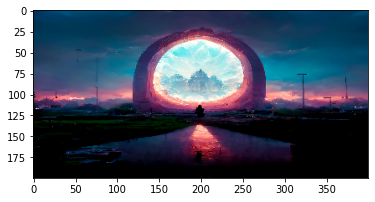

In [19]:
resized_image = cv2.resize(raw_image, (400, 200)) # width, height
plt.imshow(resized_image);
print("Image shape: ", resized_image.shape)
print("Image Range: ", resized_image.min(), resized_image.max())

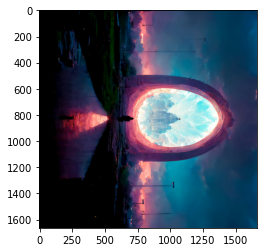

In [20]:
rotated_image = cv2.rotate(raw_image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotated_image);

For rotating by arbitrary values, you have to create an affine matrix as a *"formula"* on how to change pixel values. Something like this:

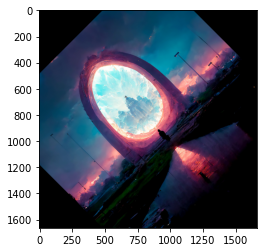

In [21]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  
  return result

rotated_image = rotate_image(raw_image, 45)
plt.imshow(rotated_image);

Sometimes, you might need to create a grayscale image, you can convert the color scheme to `GRAY`:

Image shape:  (1664, 1664)


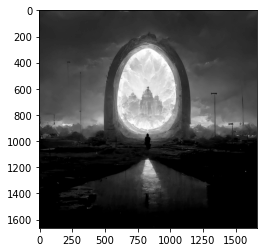

In [22]:
grayscale_image = cv2.cvtColor(raw_image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale_image, cmap="gray");
print("Image shape: ", grayscale_image.shape)

In some cases, you might want to create a binary mask from an image, meaning to convert all pixels to either zero and one:

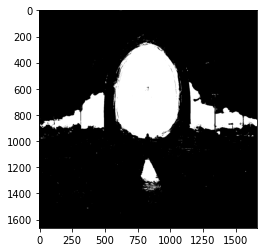

In [23]:
def binarize_image(image):
    threshold, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary_image

binary_image = binarize_image(grayscale_image)
plt.imshow(binary_image, cmap="gray");

Finally, we can save the image to disk using:

In [24]:
cv2.imwrite("binary_image.png", binary_image)

True

Videos are created by sequentially showing images one after the other. So we can open a single frame, manipulate it, and then put the frames backtogether.

In [25]:
capture = cv2.VideoCapture("video.mp4")
new_capture = cv2.VideoWriter("new_video.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 30, (100, 100))
while True:
    rect, frame = capture.read()

    if not rect:
        break

    new_frame = cv2.resize(frame, (100, 100), cv2.INTER_AREA)
    new_capture.write(new_frame)


capture.release()
new_capture.release()

There are other libraries for video opening, like `imageio` but all they do is just open the video, and frame-by-frame processing should be done by either of these three libraries.

## 3. Final Challenge

When doing deep learning projects, we need to make the shape of all images the same, so our models be trained on one image resolution. Here we have 14 images in the `./samples` folder:

In [26]:
from glob import glob

image_paths = sorted(glob("samples/*.*"))
print(image_paths)

['samples\\img_1.png', 'samples\\img_10.png', 'samples\\img_11.jpg', 'samples\\img_12.png', 'samples\\img_13.jpg', 'samples\\img_14.png', 'samples\\img_2.png', 'samples\\img_3.jpg', 'samples\\img_4.png', 'samples\\img_5.png', 'samples\\img_6.png', 'samples\\img_7.jpg', 'samples\\img_8.png', 'samples\\img_9.jpg']


What we need is to have a function, that gets an image path (string), and image size(integer) and:
1. Reads the file
2. Converts all images to **three channels**
3. Resizes the image in a way that the **aspect ratio is not changes**.
4. Pads the extra space around the image, so that **the image would be centered**.
5. Saves the image to disk in a new folder called `./new_samples` as **.png** format.

You can use a mix of the three libraries that we mentioned today.

In [27]:
def standardize_image(image_path, image_size):
    ## START CODE HERE ## (≈ 20 lines of code)
    # 1. Read the image
    image = io.imread(image_path)
    # 2. Ensure the image is RGB
    if len(image.shape)==2:
        image = np.expand_dims(image, axis=2)
    if image.shape[-1]==4:
        image = image[:,:,:3]
    if image.shape[-1]==1:
        image = np.concatenate([image,image,image], axis=2)
    # 3. Resize the image
    new_dim = np.array(image.shape[:2])//(max(image.shape[:2])/image_size)
    image = resize(image, new_dim)
    image = (image*255).astype(np.uint8)

    # 4. Pad the image
    larger_image = np.zeros((image_size,image_size,3), dtype=np.uint8)
    larger_image[(image_size-image.shape[0])//2:(image_size-image.shape[0])//2 + image.shape[0],
                 (image_size-image.shape[1])//2:(image_size-image.shape[1])//2 + image.shape[1],
                 :
                 ] = image

    # 5. Save the image
    new_path = image_path.replace("samples", "new_samples")
    new_path = new_path.replace("jpg", "png")
    io.imsave(new_path, larger_image)

    ## END CODE HERE ##

    return image

In [28]:
#Sanity Check
from skimage import io

new_path = [path.replace("samples", "new_samples") for path in image_paths]
for path in image_paths:
    standardize_image(image_path=path, image_size=256)
    new_path = path.replace("samples", "new_samples")
    new_path = new_path.replace("jpg", "png")
    new_image = io.imread(new_path)
    if new_image.shape != (256, 256, 3):
        print("Image shape is not correct for image: ", path)
        break
    if new_image.min() < 0 or new_image.max() > 255:
        print("Image range is not correct for image: ", path)
        break
else:
    print("All images are correct!")

All images are correct!


Thank you for your attention!